  # Analisis de datos en trabajadores activos

Este análisis es para ver como esta distribuido la población de trabajadores que cotizan para el issste y en que intervalo de edad esta 
concentrado y poner énfasis en el desarrollo de programas de atencion medica para este grupo de edad. 

In [1]:
from scipy import stats
import pandas as pd
import seaborn as sns
import mysql.connector
import matplotlib.pyplot as plt
import datetime as dt

### Primera parte. Adquisicion del dataset

Procedemos a conectarnos a la base de datos:

In [2]:
cnx = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="******",
    database="fuentes_brot"
)

In [3]:
cursor = cnx.cursor()

Y vemos que tablas contiene:

In [4]:
pd.read_sql_query("show tables", cnx)

,Tables_in_fuentes_brot
0,beneficiarios
1,titular
2,titulares_fb


Seleccionamos la de "titulares_fb que es la que nos interesa y procedemos a ver el contenido:

In [5]:
df = pd.read_sql_query("SELECT CAP, FECHA_NACIMIENTO, APELLIDO_PATERNO, APELLIDO_MATERNO, NOMBRE, GENERO, TIPO_DE_DIRECTO, RAMO1, REGIMEN, ESTATUS, BENEFICIARIOS_REG from titulares_fb", cnx)
df

,CAP,FECHA_NACIMIENTO,APELLIDO_PATERNO,APELLIDO_MATERNO,NOMBRE,GENERO,TIPO_DE_DIRECTO,RAMO1,REGIMEN,ESTATUS,BENEFICIARIOS_REG
0,NO,1961-09-10,ALVARADO,AMADOR,MARIA ALEJANDRA,MUJER,TRABAJADOR,N/A,DECIMO TRANSITORIO,INACTIVO,4
1,NO,1963-10-03,AMADO,AVILA,ARACELI,MUJER,PENSIONISTA,PENSIONISTAS Y JUBILADOS CON CARGO AL I.S.S.S....,DECIMO TRANSITORIO,VIGENTE,2
2,NO,1981-07-28,ANAYA,ALVAREZ,AARON,HOMBRE,TRABAJADOR,ISSSTE,CUENTA INDIVIDUAL,VIGENTE,0
3,NO,1943-05-28,ALBA,ALDAVE,MARIA CRISTINA,MUJER,PENSIONISTA,PENSIONISTAS Y JUBILADOS CON CARGO AL I.S.S.S....,DECIMO TRANSITORIO,VIGENTE,1
4,NO,1946-04-25,ARANDA,ARANDA,CLARA EUGENIA,MUJER,PENSIONISTA,PENSIONISTAS Y JUBILADOS CON CARGO AL I.S.S.S....,DECIMO TRANSITORIO,VIGENTE,0
...,...,...,...,...,...,...,...,...,...,...,...
418,NO,1963-12-02,ZUÑIGA,SANCHEZ,MARIBEL,MUJER,TRABAJADOR,GOBIERNO DEL DISTRITO FEDERAL (G.D.F.),CUENTA INDIVIDUAL,VIGENTE,2
419,NO,1981-06-01,ZUÑIGA,SANTIAGO,ZAYDA NELSY,MUJER,TRABAJADOR,N/A,CUENTA INDIVIDUAL,INACTIVO,0
420,NO,1983-11-04,ZUÑIGA,TORRES,SILVIA,MUJER,TRABAJADOR,N/A,CUENTA INDIVIDUAL,INACTIVO,0
421,NO,1946-07-17,ZUÑIGA,VAZQUEZ,JORGE MIGUEL,HOMBRE,TRABAJADOR,SECRETARIA DE COMUNICACIONES Y TRANSPORTES (SCT),CUENTA INDIVIDUAL,VIGENTE,0


Se genera dataframe llamado "titulares_fb.csv" y se cierra conexion:

In [6]:
df.to_csv('c:/users/dell/Documents/data analysis/modulo4/proyecto final1/titulares_fb.csv')

In [7]:
cursor.close()

True

## Segunda parte. Procesamiento de datos

Teniendo el dataset con el que se va a trabajar se inicia con el procesamiento. Lo primero que se hace es abrir el dataset:

In [8]:
df_1 = pd.read_csv('c:/users/dell/Documents/data analysis/modulo4/proyecto final1/titulares_fb.csv')
df_1

,Unnamed: 0,CAP,FECHA_NACIMIENTO,APELLIDO_PATERNO,APELLIDO_MATERNO,NOMBRE,GENERO,TIPO_DE_DIRECTO,RAMO1,REGIMEN,ESTATUS,BENEFICIARIOS_REG
0,0,NO,1961-09-10,ALVARADO,AMADOR,MARIA ALEJANDRA,MUJER,TRABAJADOR,NaN,DECIMO TRANSITORIO,INACTIVO,4
1,1,NO,1963-10-03,AMADO,AVILA,ARACELI,MUJER,PENSIONISTA,PENSIONISTAS Y JUBILADOS CON CARGO AL I.S.S.S....,DECIMO TRANSITORIO,VIGENTE,2
2,2,NO,1981-07-28,ANAYA,ALVAREZ,AARON,HOMBRE,TRABAJADOR,ISSSTE,CUENTA INDIVIDUAL,VIGENTE,0
3,3,NO,1943-05-28,ALBA,ALDAVE,MARIA CRISTINA,MUJER,PENSIONISTA,PENSIONISTAS Y JUBILADOS CON CARGO AL I.S.S.S....,DECIMO TRANSITORIO,VIGENTE,1
4,4,NO,1946-04-25,ARANDA,ARANDA,CLARA EUGENIA,MUJER,PENSIONISTA,PENSIONISTAS Y JUBILADOS CON CARGO AL I.S.S.S....,DECIMO TRANSITORIO,VIGENTE,0
...,...,...,...,...,...,...,...,...,...,...,...,...
418,418,NO,1963-12-02,ZUÑIGA,SANCHEZ,MARIBEL,MUJER,TRABAJADOR,GOBIERNO DEL DISTRITO FEDERAL (G.D.F.),CUENTA INDIVIDUAL,VIGENTE,2
419,419,NO,1981-06-01,ZUÑIGA,SANTIAGO,ZAYDA NELSY,MUJER,TRABAJADOR,NaN,CUENTA INDIVIDUAL,INACTIVO,0
420,420,NO,1983-11-04,ZUÑIGA,TORRES,SILVIA,MUJER,TRABAJADOR,NaN,CUENTA INDIVIDUAL,INACTIVO,0
421,421,NO,1946-07-17,ZUÑIGA,VAZQUEZ,JORGE MIGUEL,HOMBRE,TRABAJADOR,SECRETARIA DE COMUNICACIONES Y TRANSPORTES (SCT),CUENTA INDIVIDUAL,VIGENTE,0


primero se hace el reindexado:

In [9]:
df_2 = df_1.set_index(pd.Series(range(1,424)))
df_2

,Unnamed: 0,CAP,FECHA_NACIMIENTO,APELLIDO_PATERNO,APELLIDO_MATERNO,NOMBRE,GENERO,TIPO_DE_DIRECTO,RAMO1,REGIMEN,ESTATUS,BENEFICIARIOS_REG
1,0,NO,1961-09-10,ALVARADO,AMADOR,MARIA ALEJANDRA,MUJER,TRABAJADOR,NaN,DECIMO TRANSITORIO,INACTIVO,4
2,1,NO,1963-10-03,AMADO,AVILA,ARACELI,MUJER,PENSIONISTA,PENSIONISTAS Y JUBILADOS CON CARGO AL I.S.S.S....,DECIMO TRANSITORIO,VIGENTE,2
3,2,NO,1981-07-28,ANAYA,ALVAREZ,AARON,HOMBRE,TRABAJADOR,ISSSTE,CUENTA INDIVIDUAL,VIGENTE,0
4,3,NO,1943-05-28,ALBA,ALDAVE,MARIA CRISTINA,MUJER,PENSIONISTA,PENSIONISTAS Y JUBILADOS CON CARGO AL I.S.S.S....,DECIMO TRANSITORIO,VIGENTE,1
5,4,NO,1946-04-25,ARANDA,ARANDA,CLARA EUGENIA,MUJER,PENSIONISTA,PENSIONISTAS Y JUBILADOS CON CARGO AL I.S.S.S....,DECIMO TRANSITORIO,VIGENTE,0
...,...,...,...,...,...,...,...,...,...,...,...,...
419,418,NO,1963-12-02,ZUÑIGA,SANCHEZ,MARIBEL,MUJER,TRABAJADOR,GOBIERNO DEL DISTRITO FEDERAL (G.D.F.),CUENTA INDIVIDUAL,VIGENTE,2
420,419,NO,1981-06-01,ZUÑIGA,SANTIAGO,ZAYDA NELSY,MUJER,TRABAJADOR,NaN,CUENTA INDIVIDUAL,INACTIVO,0
421,420,NO,1983-11-04,ZUÑIGA,TORRES,SILVIA,MUJER,TRABAJADOR,NaN,CUENTA INDIVIDUAL,INACTIVO,0
422,421,NO,1946-07-17,ZUÑIGA,VAZQUEZ,JORGE MIGUEL,HOMBRE,TRABAJADOR,SECRETARIA DE COMUNICACIONES Y TRANSPORTES (SCT),CUENTA INDIVIDUAL,VIGENTE,0


Se ve que campos contiene el dataset:

In [10]:
df_2.columns

Index(['Unnamed: 0', 'CAP', 'FECHA_NACIMIENTO', 'APELLIDO_PATERNO',
       'APELLIDO_MATERNO', 'NOMBRE', 'GENERO', 'TIPO_DE_DIRECTO', 'RAMO1',
       'REGIMEN', 'ESTATUS', 'BENEFICIARIOS_REG'],
      dtype='object')

se procede a realizar el filtrado para generar un dataframe con solo trabajadores activos:

In [11]:
trab = df_2["TIPO_DE_DIRECTO"] == "TRABAJADOR"
trab

1       True
2      False
3       True
4      False
5      False
       ...  
419     True
420     True
421     True
422     True
423     True
Name: TIPO_DE_DIRECTO, Length: 423, dtype: bool

para sacar los trabajadores activos se necesita hacer filtrado tambien por ramo:

In [12]:
trab1 = df_2["RAMO1"] != "CAJA DE PREV. PARA TRABS. A LISTA DE RAYA DEL GOB. DEL D.F."
trab1

1      True
2      True
3      True
4      True
5      True
       ... 
419    True
420    True
421    True
422    True
423    True
Name: RAMO1, Length: 423, dtype: bool

In [13]:
trab2 = df_2["RAMO1"] != "CONTINUACION VOLUNTARIA EN EL REGIMEN OBLIGATORIO"
trab2

1      True
2      True
3      True
4      True
5      True
       ... 
419    True
420    True
421    True
422    True
423    True
Name: RAMO1, Length: 423, dtype: bool

In [14]:
trab3 = df_2["RAMO1"] != "PENS. Y JUB. DE LA CAJA DE PREV. DE LA POLICIA PREVENTIVA DE"
trab3

1      True
2      True
3      True
4      True
5      True
       ... 
419    True
420    True
421    True
422    True
423    True
Name: RAMO1, Length: 423, dtype: bool

In [15]:
trab4 = df_2["ESTATUS"] == "VIGENTE"
trab4

1      False
2       True
3       True
4       True
5       True
       ...  
419     True
420    False
421    False
422     True
423     True
Name: ESTATUS, Length: 423, dtype: bool

In [16]:
trab5 = df_2["CAP"] == "NO"
trab5

1      True
2      True
3      True
4      True
5      True
       ... 
419    True
420    True
421    True
422    True
423    True
Name: CAP, Length: 423, dtype: bool

In [17]:
tv = df_2[trab & trab1 & trab2 & trab3 & trab4 & trab5]
tv

,Unnamed: 0,CAP,FECHA_NACIMIENTO,APELLIDO_PATERNO,APELLIDO_MATERNO,NOMBRE,GENERO,TIPO_DE_DIRECTO,RAMO1,REGIMEN,ESTATUS,BENEFICIARIOS_REG
3,2,NO,1981-07-28,ANAYA,ALVAREZ,AARON,HOMBRE,TRABAJADOR,ISSSTE,CUENTA INDIVIDUAL,VIGENTE,0
6,5,NO,1963-06-06,ALVARADO,ARBIZU,MARIA DEL CARMEN,MUJER,TRABAJADOR,INSTITUTO DE EDUCACION MEDIA SUPERIOR DE LA CI...,CUENTA INDIVIDUAL,VIGENTE,1
7,6,NO,1974-09-01,ANAYA,ALVAREZ,EDGAR,HOMBRE,TRABAJADOR,GOBIERNO DE LA CIUDAD DE MEXICO (G.CDMX.),CUENTA INDIVIDUAL,VIGENTE,4
8,7,NO,1982-05-26,ALVAREZ,ALVAREZ,FERNANDO RAUL,HOMBRE,TRABAJADOR,UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO,NO DISPONIBLE,VIGENTE,0
9,8,NO,1959-07-03,ARANA,ALVAREZ,GUSTAVO ADOLFO,HOMBRE,TRABAJADOR,GOBIERNO DE LA CIUDAD DE MEXICO (G.CDMX.),DECIMO TRANSITORIO,VIGENTE,4
...,...,...,...,...,...,...,...,...,...,...,...,...
413,412,NO,1964-10-14,ZUBILLAGA,MARTINEZ,ENRIQUE,HOMBRE,TRABAJADOR,GOBIERNO DEL DISTRITO FEDERAL (G.D.F.),NO DISPONIBLE,VIGENTE,0
418,417,NO,1962-09-25,ZUÑIGA,SANCHEZ,LETICIA CATALINA,MUJER,TRABAJADOR,GOBIERNO DEL DISTRITO FEDERAL (G.D.F.),CUENTA INDIVIDUAL,VIGENTE,6
419,418,NO,1963-12-02,ZUÑIGA,SANCHEZ,MARIBEL,MUJER,TRABAJADOR,GOBIERNO DEL DISTRITO FEDERAL (G.D.F.),CUENTA INDIVIDUAL,VIGENTE,2
422,421,NO,1946-07-17,ZUÑIGA,VAZQUEZ,JORGE MIGUEL,HOMBRE,TRABAJADOR,SECRETARIA DE COMUNICACIONES Y TRANSPORTES (SCT),CUENTA INDIVIDUAL,VIGENTE,0


In [18]:
tv.columns

Index(['Unnamed: 0', 'CAP', 'FECHA_NACIMIENTO', 'APELLIDO_PATERNO',
       'APELLIDO_MATERNO', 'NOMBRE', 'GENERO', 'TIPO_DE_DIRECTO', 'RAMO1',
       'REGIMEN', 'ESTATUS', 'BENEFICIARIOS_REG'],
      dtype='object')

Se procede a eliminar datos sensibles y no esenciales para el estudio:

In [20]:
tv_1 = tv.drop(columns=["Unnamed: 0", "CAP", "APELLIDO_PATERNO", "APELLIDO_MATERNO", "NOMBRE", "TIPO_DE_DIRECTO", "RAMO1", "ESTATUS"])
tv_1

,FECHA_NACIMIENTO,GENERO,REGIMEN,BENEFICIARIOS_REG
3,1981-07-28,HOMBRE,CUENTA INDIVIDUAL,0
6,1963-06-06,MUJER,CUENTA INDIVIDUAL,1
7,1974-09-01,HOMBRE,CUENTA INDIVIDUAL,4
8,1982-05-26,HOMBRE,NO DISPONIBLE,0
9,1959-07-03,HOMBRE,DECIMO TRANSITORIO,4
...,...,...,...,...
413,1964-10-14,HOMBRE,NO DISPONIBLE,0
418,1962-09-25,MUJER,CUENTA INDIVIDUAL,6
419,1963-12-02,MUJER,CUENTA INDIVIDUAL,2
422,1946-07-17,HOMBRE,CUENTA INDIVIDUAL,0


Se necesita saber si hay datos nulos:

In [21]:
tv_1.isna()

,FECHA_NACIMIENTO,GENERO,REGIMEN,BENEFICIARIOS_REG
3,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False
...,...,...,...,...
413,False,False,False,False
418,False,False,False,False
419,False,False,False,False
422,False,False,False,False


Y saber cuantos son:

In [22]:
tv_1.isna().sum()

FECHA_NACIMIENTO     0
GENERO               0
REGIMEN              0
BENEFICIARIOS_REG    0
dtype: int64

lo siguiente es ver que tipo de variables contiene cada campo:

In [23]:
tv_1.dtypes

FECHA_NACIMIENTO     object
GENERO               object
REGIMEN              object
BENEFICIARIOS_REG     int64
dtype: object

Como se observa el campo "FECHA_NACIMIENTO" hay que hacer cambio para que sea tipo datetime

In [24]:
def nacimiento(valor):
    return pd.to_datetime(valor)

In [25]:
tv_1["FECHA_NACIMIENTO"] = tv_1["FECHA_NACIMIENTO"].apply(nacimiento)
tv_1

,FECHA_NACIMIENTO,GENERO,REGIMEN,BENEFICIARIOS_REG
3,1981-07-28,HOMBRE,CUENTA INDIVIDUAL,0
6,1963-06-06,MUJER,CUENTA INDIVIDUAL,1
7,1974-09-01,HOMBRE,CUENTA INDIVIDUAL,4
8,1982-05-26,HOMBRE,NO DISPONIBLE,0
9,1959-07-03,HOMBRE,DECIMO TRANSITORIO,4
...,...,...,...,...
413,1964-10-14,HOMBRE,NO DISPONIBLE,0
418,1962-09-25,MUJER,CUENTA INDIVIDUAL,6
419,1963-12-02,MUJER,CUENTA INDIVIDUAL,2
422,1946-07-17,HOMBRE,CUENTA INDIVIDUAL,0


Se verifica que se hizo la conversion:

In [27]:
tv_1.dtypes

FECHA_NACIMIENTO     datetime64[ns]
GENERO                       object
REGIMEN                      object
BENEFICIARIOS_REG             int64
dtype: object

Se necesita generar dos campos más, uno que muestre la edad y otro que menciona en que intervalo de edad se encuentra:

In [28]:
def longevidad (valor):
    hoy =dt.datetime.today()
    return  hoy.year - valor.year - ((hoy.month, hoy.day) < (valor.month, valor.day))

In [30]:
tv_1["EDAD"] = tv_1["FECHA_NACIMIENTO"].apply(longevidad)
tv_1

,FECHA_NACIMIENTO,GENERO,REGIMEN,BENEFICIARIOS_REG,EDAD
3,1981-07-28,HOMBRE,CUENTA INDIVIDUAL,0,40
6,1963-06-06,MUJER,CUENTA INDIVIDUAL,1,58
7,1974-09-01,HOMBRE,CUENTA INDIVIDUAL,4,47
8,1982-05-26,HOMBRE,NO DISPONIBLE,0,39
9,1959-07-03,HOMBRE,DECIMO TRANSITORIO,4,62
...,...,...,...,...,...
413,1964-10-14,HOMBRE,NO DISPONIBLE,0,56
418,1962-09-25,MUJER,CUENTA INDIVIDUAL,6,59
419,1963-12-02,MUJER,CUENTA INDIVIDUAL,2,57
422,1946-07-17,HOMBRE,CUENTA INDIVIDUAL,0,75


In [31]:
etiqueta = ['21 a 30','31 a 40','41 a 50','51 a 60','61 a 70','71 a 80','81 a 90','91 a 100','100 y mas']
tv_1['INTERVALO_EDAD'] = pd.cut(x = tv_1['EDAD'], bins = [20, 30, 40, 50, 60, 70, 80, 90 ,100, 110], labels = etiqueta)
tv_1

,FECHA_NACIMIENTO,GENERO,REGIMEN,BENEFICIARIOS_REG,EDAD,INTERVALO_EDAD
3,1981-07-28,HOMBRE,CUENTA INDIVIDUAL,0,40,31 a 40
6,1963-06-06,MUJER,CUENTA INDIVIDUAL,1,58,51 a 60
7,1974-09-01,HOMBRE,CUENTA INDIVIDUAL,4,47,41 a 50
8,1982-05-26,HOMBRE,NO DISPONIBLE,0,39,31 a 40
9,1959-07-03,HOMBRE,DECIMO TRANSITORIO,4,62,61 a 70
...,...,...,...,...,...,...
413,1964-10-14,HOMBRE,NO DISPONIBLE,0,56,51 a 60
418,1962-09-25,MUJER,CUENTA INDIVIDUAL,6,59,51 a 60
419,1963-12-02,MUJER,CUENTA INDIVIDUAL,2,57,51 a 60
422,1946-07-17,HOMBRE,CUENTA INDIVIDUAL,0,75,71 a 80


Checamos de nuevo los tipos de variable

In [32]:
tv_1.dtypes

FECHA_NACIMIENTO     datetime64[ns]
GENERO                       object
REGIMEN                      object
BENEFICIARIOS_REG             int64
EDAD                          int64
INTERVALO_EDAD             category
dtype: object

Se tiene el dataset que se necesita para hacer el análisis de datos

### Tercera parte. Análisis de datos

Teniendo ya el dataset que se necesita se procede a sacar primero la grafica para la cantidad de trabajadores por genero:

In [33]:
tv_2 = tv_1
counts = tv_1['GENERO'].value_counts() 
counts

HOMBRE    110
MUJER      98
Name: GENERO, dtype: int64

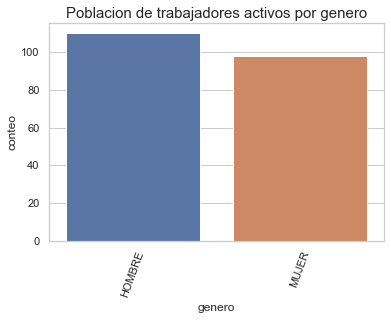

In [34]:
sns.set_theme(style = 'whitegrid')
ax = sns.barplot(x=counts.index, y=counts)
ax.set_title('Poblacion de trabajadores activos por genero', fontsize=15, pad=5)
ax.set(ylabel='conteo');
ax.set(xlabel='genero');
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

En porcentaje sería:

In [35]:
porcentaje = counts * 100 / counts.sum()
porcentaje

HOMBRE    52.884615
MUJER     47.115385
Name: GENERO, dtype: float64

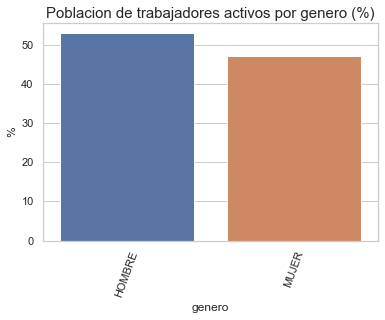

In [36]:
sns.set_theme(style = 'whitegrid')
ax = sns.barplot(x=porcentaje.index, y=porcentaje)
ax.set_title('Poblacion de trabajadores activos por genero (%)', fontsize=15, pad=5)
ax.set(ylabel='%');
ax.set(xlabel='genero');
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

Ahora queremos saber en que intervalos de edad estan distribuidos los trajajadores

In [37]:
counts_1 = tv_2['INTERVALO_EDAD'].value_counts()
counts_1

41 a 50      61
51 a 60      58
31 a 40      37
61 a 70      34
21 a 30      13
71 a 80       5
81 a 90       0
91 a 100      0
100 y mas     0
Name: INTERVALO_EDAD, dtype: int64

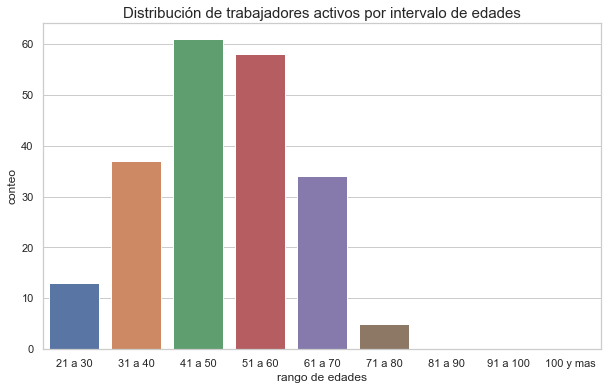

In [38]:
ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x= counts_1.index, y= counts_1)
ax.set_title('Distribución de trabajadores activos por intervalo de edades', fontsize=15, pad=5)
ax.set(xlabel='rango de edades');
ax.set(ylabel='conteo');

Esta misma dsitribución se muestra ahora por genero:

In [39]:
tv_2['count'] = 1
tv_2

,FECHA_NACIMIENTO,GENERO,REGIMEN,BENEFICIARIOS_REG,EDAD,INTERVALO_EDAD,count
3,1981-07-28,HOMBRE,CUENTA INDIVIDUAL,0,40,31 a 40,1
6,1963-06-06,MUJER,CUENTA INDIVIDUAL,1,58,51 a 60,1
7,1974-09-01,HOMBRE,CUENTA INDIVIDUAL,4,47,41 a 50,1
8,1982-05-26,HOMBRE,NO DISPONIBLE,0,39,31 a 40,1
9,1959-07-03,HOMBRE,DECIMO TRANSITORIO,4,62,61 a 70,1
...,...,...,...,...,...,...,...
413,1964-10-14,HOMBRE,NO DISPONIBLE,0,56,51 a 60,1
418,1962-09-25,MUJER,CUENTA INDIVIDUAL,6,59,51 a 60,1
419,1963-12-02,MUJER,CUENTA INDIVIDUAL,2,57,51 a 60,1
422,1946-07-17,HOMBRE,CUENTA INDIVIDUAL,0,75,71 a 80,1


In [40]:
counts_2 = tv_2.groupby(['INTERVALO_EDAD', 'GENERO'])['count'].sum()
counts_2

INTERVALO_EDAD  GENERO
21 a 30         HOMBRE     6
                MUJER      7
31 a 40         HOMBRE    18
                MUJER     19
41 a 50         HOMBRE    31
                MUJER     30
51 a 60         HOMBRE    32
                MUJER     26
61 a 70         HOMBRE    19
                MUJER     15
71 a 80         HOMBRE     4
                MUJER      1
81 a 90         HOMBRE     0
                MUJER      0
91 a 100        HOMBRE     0
                MUJER      0
100 y mas       HOMBRE     0
                MUJER      0
Name: count, dtype: int64

In [41]:
counts_2 = counts_2.unstack(1)
counts_2

GENERO,HOMBRE,MUJER
INTERVALO_EDAD,,
21 a 30,6,7
31 a 40,18,19
41 a 50,31,30
51 a 60,32,26
61 a 70,19,15
71 a 80,4,1
81 a 90,0,0
91 a 100,0,0
100 y mas,0,0


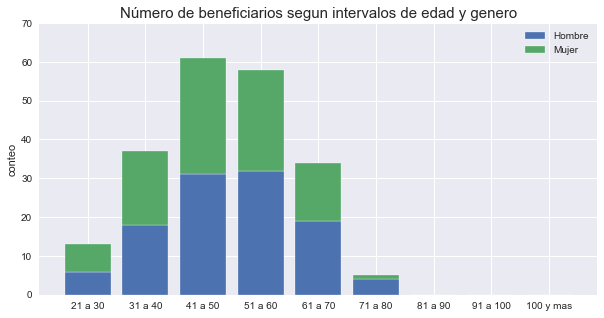

In [42]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

plt1 = ax.bar(counts_2.index, counts_2['HOMBRE'], label='HOMBRE')
plt2 = ax.bar(counts_2.index, counts_2['MUJER'], bottom= counts_2['HOMBRE'])

ax.set_ylabel('conteo')
ax.set_title('Número de beneficiarios segun intervalos de edad y genero', fontsize=15, pad=5);
plt.legend((plt1[0], plt2[0]), ('Hombre', 'Mujer'));
ax.set_ylim(0, 70);

Le sacamos l media, la media truncada y la mediana para saber en que edad anda la poblacion de trabajadores activos

In [43]:
mt = stats.trim_mean(tv_2["EDAD"], 0.1)
print(f'La media truncada es: {mt:,.2f} años ')

La media truncada es: 49.45 años 


In [44]:
media = tv_2["EDAD"].mean()
print(f'La media es: {media:,.2f} años ')

La media es: 49.29 años 


In [45]:
media = tv_2["EDAD"].median()

print(f'La mediana es: {media:,.2f} años ')

La mediana es: 49.00 años 


In [46]:
print(f'La desviación estandar es: { tv_2["EDAD"].std()}')

La desviación estandar es: 11.348904600766964


In [47]:
tv_2["EDAD"].mode()

0    47
dtype: int64

In [48]:
print(f'Valor mínimo: {tv_2["EDAD"].min()}')
print(f'Percentil 0: {tv_2["EDAD"].quantile(0)}')
print(f'Percentil 10: {tv_2["EDAD"].quantile(0.1)}')
print(f'Percentil 25: {tv_2["EDAD"].quantile(0.25)}')
print(f'Percentil 50: {tv_2["EDAD"].median()}')
print(f'Mediana: {tv_2["EDAD"].quantile(0.5)}')
print(f'Percentil 75: {tv_2["EDAD"].quantile(0.75)}')
print(f'Percentil 90: {tv_2["EDAD"].quantile(0.9)}')
print(f'Percentil 100: {tv_2["EDAD"].quantile(1)}')
print(f'Valor máximo: {tv_2["EDAD"].max()}')

Valor mínimo: 21
Percentil 0: 21.0
Percentil 10: 34.0
Percentil 25: 41.0
Percentil 50: 49.0
Mediana: 49.0
Percentil 75: 57.0
Percentil 90: 64.30000000000001
Percentil 100: 76.0
Valor máximo: 76


In [49]:
print(f'El rango intercuartilico se encuentra en: {tv_2["EDAD"].quantile(0.75) - tv_2["EDAD"].quantile(0.25)}')

El rango intercuartilico se encuentra en: 16.0


Se realiza un boxplot para ver como estan distribuidos los cuartiles:

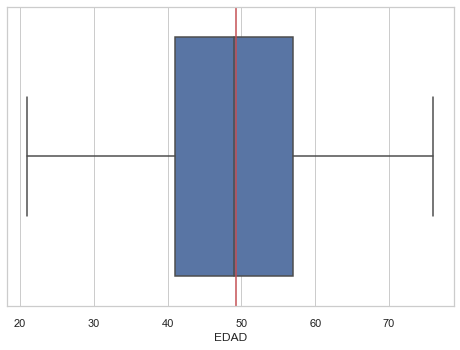

In [50]:
sns.set(style="whitegrid")
sns.boxplot(x=tv_2["EDAD"])
plt.axvline(tv_2["EDAD"].mean(), c='r');

Como se ve en el boxplot la mediana y media estan casi a la par y no hay valores atipicos el el dataset. Por último queremos ver cual es la correlación entre la edad de los trabajdores y el número de beneficiarios registrados por estos.

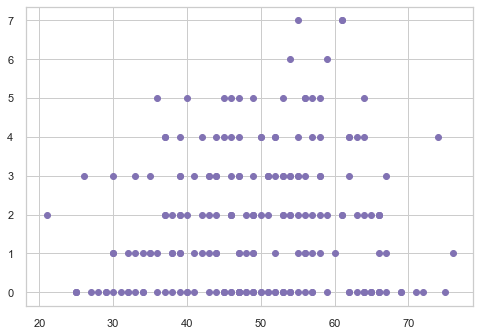

In [51]:
sns.set(style="whitegrid")
plt.scatter(x=tv_2['EDAD'], y= tv_2['BENEFICIARIOS_REG'], c='m');

In [52]:
relacion = tv_2['EDAD'].corr(tv_2['BENEFICIARIOS_REG'] )
print(f'Correlación entre las edad y beneficiaros dados de alta: { relacion }' )

Correlación entre las edad y beneficiaros dados de alta: 0.10657764427043481


## Conclusiones:

El dataset que se utilizo fue construido manualmente y hasta el momento no ha sido terminado, pero permitió dar un pequeño bosquejo sobre 
el intervalo en edades en la que esta actualmente la clinica en donde se labora, y en un futuro terminado poder mostrar datos más realistas.
